In [1]:
import numpy as np
from src.dataset import ImageDataset

dataset = ImageDataset('database')

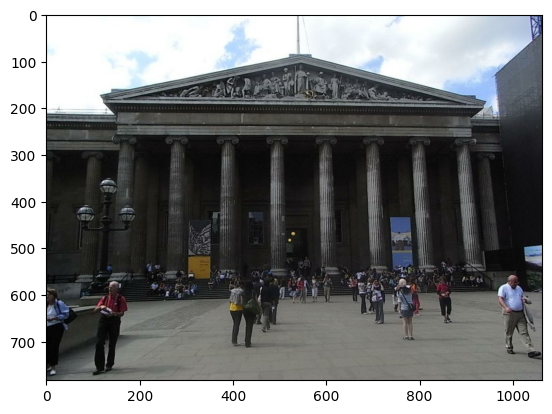

In [2]:
from src.utils import read_image, get_topk_indices

img = read_image('database/00350405_2611802704.jpg')

#plot image given an ndarray
import matplotlib.pyplot as plt 
plt.imshow(img)

In [24]:
import numpy as np

array = np.random.rand(100000000)

In [25]:
array.shape

(100000000,)

In [26]:
rs = 0
for v in array:
    rs += v
print(rs)

49998886.65278668


In [5]:
import numpy as np
vlads = np.load('output/vlads.npy')

In [7]:
top_indices = get_topk_indices(vlads, img, 10)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4096 is different from 3)